# Lending Club Case Study

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

**Problem Statement**

When borrowers apply for a loan at Lending Club, the company team wants to reduce financial risk of losing money to borrowers who fails to pay the loans. By identifying the driving factors from the dataset of existing and previous customers, team wants to reduce this risk. 

In [391]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [392]:
# Reading dataset
loan_df = pd.read_csv("loan.csv",low_memory=False)
# Displaying all columns
pd.set_option('display.max_columns', None)

In [393]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [394]:
# Getting Dimensions
loan_df.shape

(39717, 111)

In [395]:
# Getting Info
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Data Handling and Cleaning

In [396]:
# Considering only Fully paid and Charged-off customers 
# Finding loan_status values
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

From the loan_status column, we have below types of customers

   - Fully Paid 
   - Charged Off
   - Current

Considering only Charged Off and Fully Paid customers since current customers might involves defaulters and Non-defaulters.  


In [397]:
# Removing customers with loan_status as current
loan_df = loan_df[loan_df['loan_status'] != 'Current']

In [398]:
loan_df.shape

(38577, 111)

In [399]:
pd.options.display.min_rows = 111
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [400]:
# Dropping Columns with all NaN values
loan_df = loan_df.dropna(axis=1, how='all')

In [401]:
loan_df.shape

(38577, 56)

In [402]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [403]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Since the customer behaviour variables like delinq_2yrs, earliest-cr_line, inq_last_6mths etc. aren't available at the time of loan application, we are considering few columns that are available at the time of application

In [404]:
# Picking required columns for analysis to a new dataframe
updated_loan_df = loan_df[['member_id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','dti','issue_d','loan_status','purpose']].copy()

In [405]:
updated_loan_df.shape

(38577, 14)

In [406]:
updated_loan_df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,issue_d,loan_status,purpose
0,1296599,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,27.65,Dec-11,Fully Paid,credit_card
1,1314167,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,1.00,Dec-11,Charged Off,car
2,1313524,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,8.72,Dec-11,Fully Paid,small_business
3,1277178,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,20.00,Dec-11,Fully Paid,other
5,1311441,5000,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,11.20,Dec-11,Fully Paid,wedding


In [407]:
updated_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            38577 non-null  int64  
 1   loan_amnt            38577 non-null  int64  
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   grade                38577 non-null  object 
 5   sub_grade            38577 non-null  object 
 6   emp_length           37544 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   annual_inc           38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  dti                  38577 non-null  float64
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 4.4+ MB


In [408]:
updated_loan_df.isnull().sum()

member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
dti                       0
issue_d                   0
loan_status               0
purpose                   0
dtype: int64

In [409]:
# Removing emp_length null values
updated_loan_df = updated_loan_df[~updated_loan_df['emp_length'].isnull()]

In [410]:
updated_loan_df.shape

(37544, 14)

In [411]:
updated_loan_df.isnull().sum()

member_id              0
loan_amnt              0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
dti                    0
issue_d                0
loan_status            0
purpose                0
dtype: int64

In [412]:
# Checking for duplicates
updated_loan_df.duplicated().sum()

0

### Data Analysis

#### Univariate Analysis

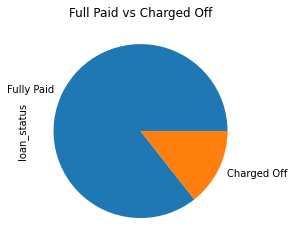

In [413]:
# loan_status column
updated_loan_df['loan_status'].value_counts().plot(kind='pie',title='Full Paid vs Charged Off')
plt.show()

In [414]:
# loan_amnt column
updated_loan_df['loan_amnt'].describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Checking for which term got more number of loans

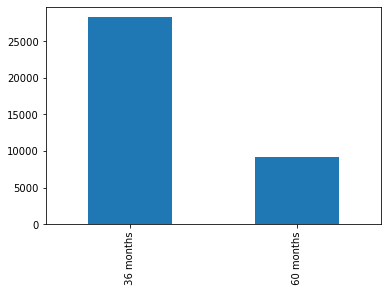

In [415]:
# Term column
updated_loan_df['term'].value_counts().plot(kind='bar')
plt.show()

From the above graph, it shows that more number of loans given for term 36 months

In [416]:
# Converting int_rate dtype to float
updated_loan_df['int_rate'] = updated_loan_df['int_rate'].apply(lambda x:float(x.replace('%','')))

Finding out the average interest rate among each type of customers

In [417]:
# Interest rate
updated_loan_df['int_rate'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

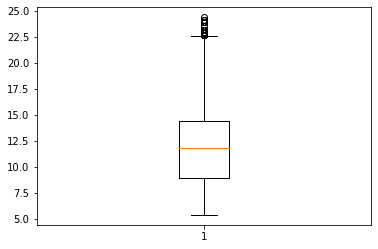

In [418]:
plt.boxplot(updated_loan_df['int_rate'])
plt.show()

The average interest rate among Fully Paid and charged off customers is 11.96

Analysing which grade got highest amount of loans

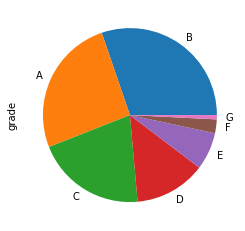

In [419]:
# Grade Column
updated_loan_df['grade'].value_counts().plot.pie()
plt.show()

By grade wise, customers with grade 'B' got more number of loans

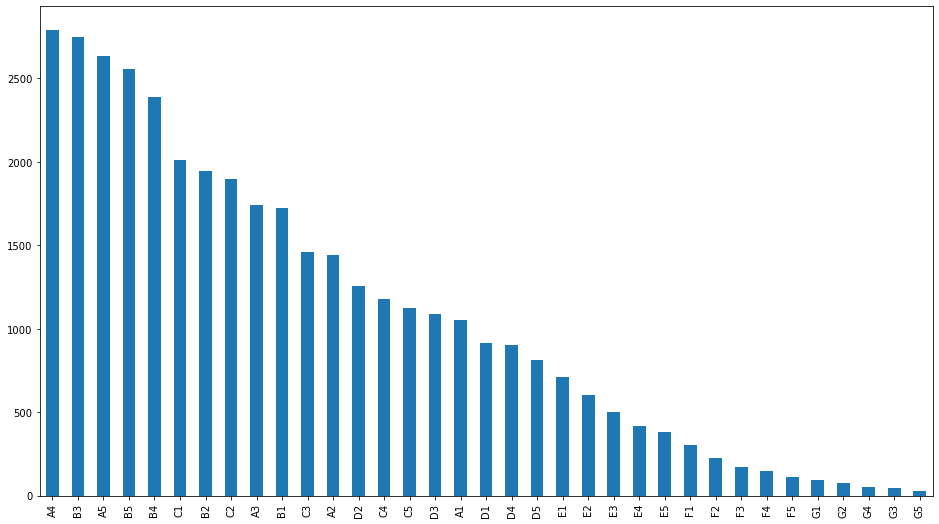

In [420]:
# Sub grade column
updated_loan_df['sub_grade'].value_counts().plot(kind='bar',figsize=(16,9))
plt.show()

In [421]:
# emp_length dtype to integer
updated_loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [422]:
updated_loan_df.shape

(37544, 14)

Using regex to replace strings in emp_length column values

In [424]:
import re
updated_loan_df['emp_length'] = updated_loan_df['emp_length'].apply(lambda x:re.sub('[\syears]','',x))

In [425]:
updated_loan_df['emp_length'].value_counts()

10+    8488
<1     4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
Name: emp_length, dtype: int64

#### Assumption
- Assuming customers with <1 year employement length as 0 year and 10+ emp_length as 11 years for better analysis

In [426]:
# Assuming <1 year as 0 year and 10+ as 11 years
updated_loan_df['emp_length'] = updated_loan_df['emp_length'].apply(lambda x:0 if(x=="<1") else x)

In [427]:
updated_loan_df['emp_length'] = updated_loan_df['emp_length'].apply(lambda x:11 if(x=="10+") else int(x))

Finding which emp_length got more number of loans

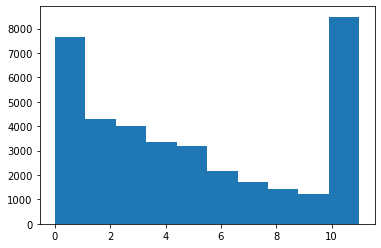

In [430]:
plt.hist(updated_loan_df['emp_length'])
plt.show()

From the above graph, customers less than 1 year and more than 10 years got more loans

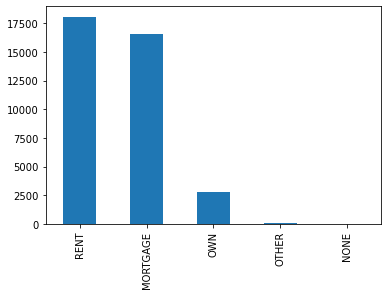

In [431]:
# home_ownership column
updated_loan_df['home_ownership'].value_counts().plot.bar()
plt.show()

Customers having home ownership as rented and mortgage applied for more loans

In [432]:
# annual_inc column
updated_loan_df['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

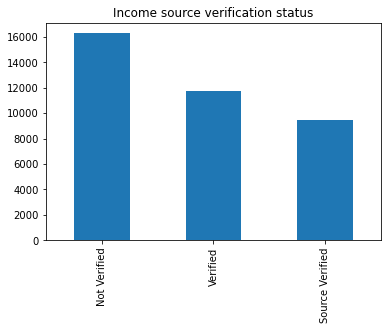

In [433]:
# verification_status column
updated_loan_df['verification_status'].value_counts().plot(kind='bar',title='Income source verification status')
plt.show()

There are more number of customers whose income source is not verified which might be the one of the factors that adds up to loan default

In [323]:
updated_loan_df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,issue_d,loan_status,purpose
0,1296599,5000,36 months,10.65,B,B2,11,RENT,24000.0,Verified,27.65,Dec-11,Fully Paid,credit_card
1,1314167,2500,60 months,15.27,C,C4,0,RENT,30000.0,Source Verified,1.00,Dec-11,Charged Off,car
2,1313524,2400,36 months,15.96,C,C5,11,RENT,12252.0,Not Verified,8.72,Dec-11,Fully Paid,small_business
3,1277178,10000,36 months,13.49,C,C1,11,RENT,49200.0,Source Verified,20.00,Dec-11,Fully Paid,other
5,1311441,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,11.20,Dec-11,Fully Paid,wedding


In [324]:
# dti column
updated_loan_df['dti'].describe()

count    37544.000000
mean        13.284186
std          6.660551
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

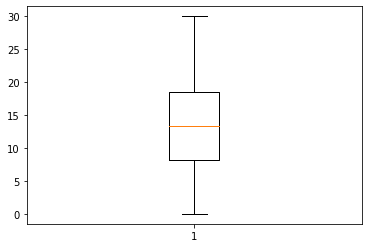

In [325]:
# dti column
plt.boxplot(updated_loan_df['dti'])
plt.show()

To Analyse at month level, extracting month from issue_d column

In [326]:
# Extracting month from issue_d column
updated_loan_df['issue_d_month'] = updated_loan_df['issue_d'].apply(lambda x:re.sub('[-\d]','',x))

In [327]:
updated_loan_df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,issue_d,loan_status,purpose,issue_d_month
0,1296599,5000,36 months,10.65,B,B2,11,RENT,24000.0,Verified,27.65,Dec-11,Fully Paid,credit_card,Dec
1,1314167,2500,60 months,15.27,C,C4,0,RENT,30000.0,Source Verified,1.00,Dec-11,Charged Off,car,Dec
2,1313524,2400,36 months,15.96,C,C5,11,RENT,12252.0,Not Verified,8.72,Dec-11,Fully Paid,small_business,Dec
3,1277178,10000,36 months,13.49,C,C1,11,RENT,49200.0,Source Verified,20.00,Dec-11,Fully Paid,other,Dec
5,1311441,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,11.20,Dec-11,Fully Paid,wedding,Dec


In [328]:
updated_loan_df.shape

(37544, 15)

<AxesSubplot:>

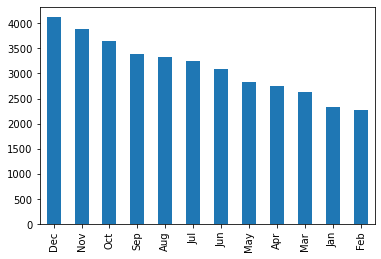

In [329]:
# issue_d_month
updated_loan_df['issue_d_month'].value_counts().plot.bar()

The year end loans are more compared to year start

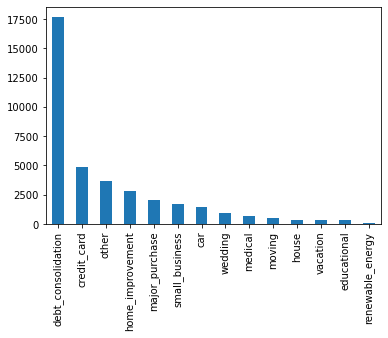

In [434]:
# purpose column
updated_loan_df['purpose'].value_counts().plot(kind='bar')
plt.show()

More number of loans applied by the customers for debt_consolidation

Making Full Paid category loan_status as 1 and Charged Off to 0

In [435]:
# Fully paid to 1 and Charged off to 0
updated_loan_df['loan_status'] = updated_loan_df['loan_status'].apply(lambda x: 1 if(x=='Fully Paid') else 0)

In [438]:
updated_loan_df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,issue_d,loan_status,purpose
0,1296599,5000,36 months,10.65,B,B2,11,RENT,24000.0,Verified,27.65,Dec-11,1,credit_card
1,1314167,2500,60 months,15.27,C,C4,0,RENT,30000.0,Source Verified,1.00,Dec-11,0,car
2,1313524,2400,36 months,15.96,C,C5,11,RENT,12252.0,Not Verified,8.72,Dec-11,1,small_business
3,1277178,10000,36 months,13.49,C,C1,11,RENT,49200.0,Source Verified,20.00,Dec-11,1,other
5,1311441,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,11.20,Dec-11,1,wedding


#### Bivariate Analysis
Analysing loan_amnt across Fully Paid and charged off customers

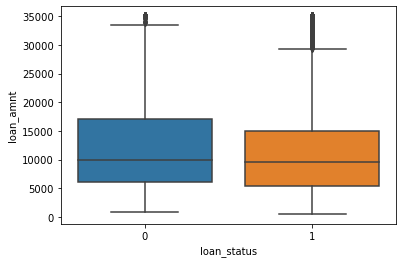

In [442]:
# loan_status vs loan_amnt

sns.boxplot(x= 'loan_status',y = 'loan_amnt', data = updated_loan_df)
plt.show()

Analysing int_rate across Fully Paid and charged off customers

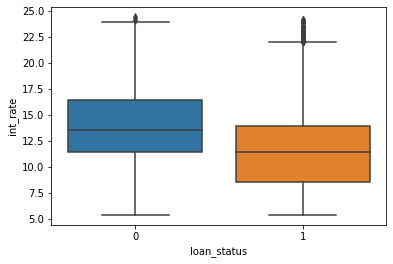

In [353]:
# loan_status vs int_rate
sns.boxplot(x= 'loan_status',y = 'int_rate', data = updated_loan_df)
plt.show()

From the graph, the __interest rate__ among charged off customers is __more__ than the Fully paid

Analysing the loan_status across different grade customers

<AxesSubplot:xlabel='grade'>

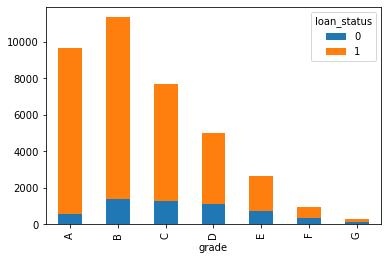

In [335]:
# loan_status vs grade
updated_loan_df.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)


From the graph, the customers with grade A are less likely to default

<AxesSubplot:xlabel='sub_grade'>

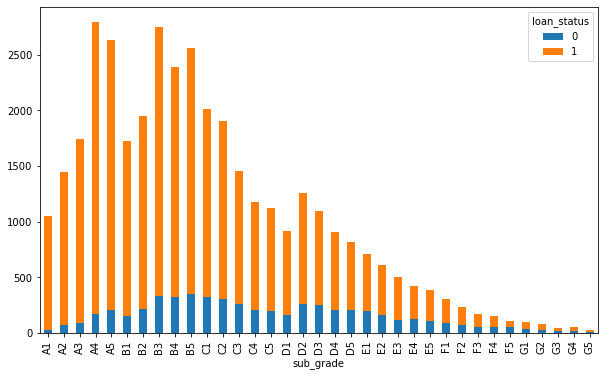

In [441]:
# loan_status vs grade
updated_loan_df.groupby('sub_grade')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,figsize =(10,6))

Categorising customers employment length column

In [443]:
# Binning emp_length
pd.cut(updated_loan_df['emp_length'],8).value_counts()

(9.625, 11.0]      8488
(-0.011, 1.375]    7677
(2.75, 4.125]      7354
(1.375, 2.75]      4291
(4.125, 5.5]       3194
(6.875, 8.25]      3146
(5.5, 6.875]       2168
(8.25, 9.625]      1226
Name: emp_length, dtype: int64

Adding Employement length bins columns to dataframe

In [444]:
updated_loan_df['emp_length_bins'] = pd.cut(updated_loan_df['emp_length'],7)

In [445]:
updated_loan_df.shape

(37544, 15)

<AxesSubplot:xlabel='emp_length_bins'>

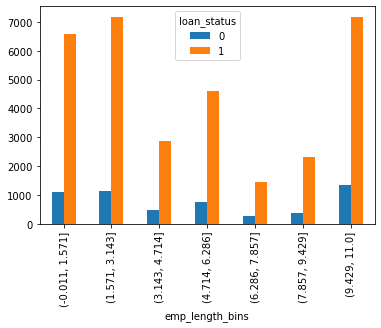

In [340]:
updated_loan_df.groupby('emp_length_bins')['loan_status'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='home_ownership'>

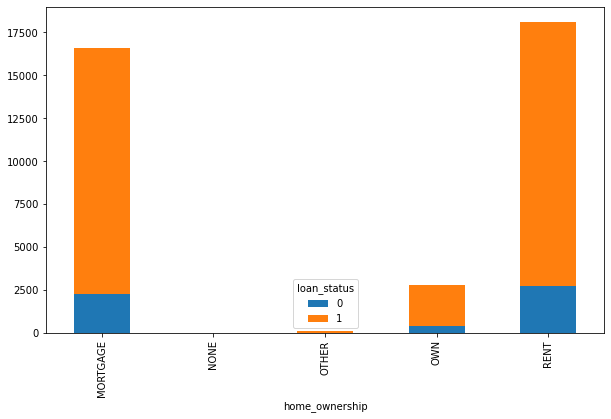

In [341]:
# home_ownership vs loan_status
updated_loan_df.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,figsize =(10,6))

In [342]:
# annual_inc

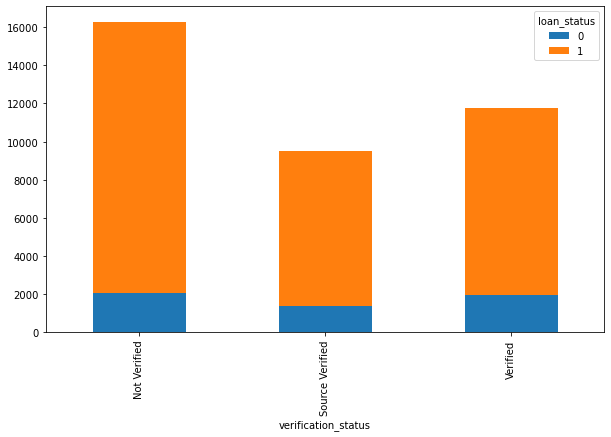

In [354]:
# verification_status vs loan_status
updated_loan_df.groupby('verification_status')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,figsize =(10,6))
plt.show()

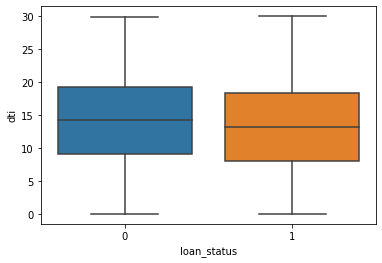

In [355]:
# loan_status vs dti
sns.boxplot(x= 'loan_status',y = 'dti', data = updated_loan_df)
plt.show()

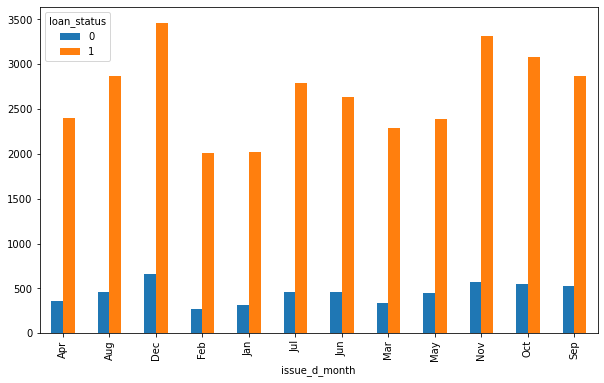

In [356]:
# loan_status vs issue_d_month
updated_loan_df.groupby('issue_d_month')['loan_status'].value_counts().unstack().plot(kind='bar',figsize=(10,6))
plt.show()

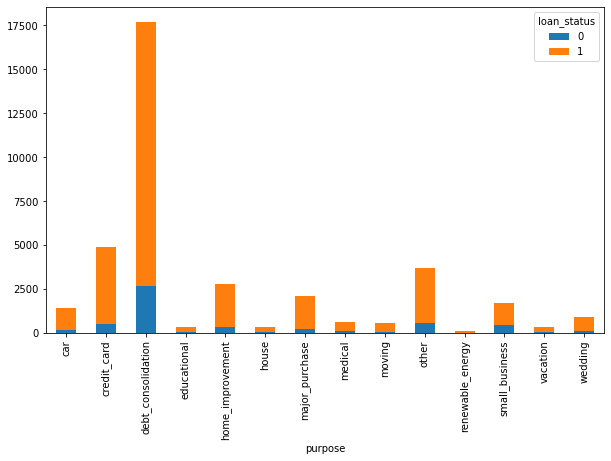

In [357]:
updated_loan_df.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,figsize =(10,6))
plt.show()